# Bank Dataset

# Summarization of Learning

## 9 steps of EDA
1. Define Problem
2. Choose right tools
3. Collection of data
4. Pre-profile
5. Pre processing of data (Clean, remove unnecessary, add relevant data)
6. Post-profile
7. Ask right Questions
8. Conclusion or Summarization
9. Actionable Insights (low hanging fruits)


## 7 Stages of ML
1. Data Collection
2. Data Preparation
3. Choose Model
4. Train Model
5. Evaluate Model
6. Improve Model
7. Predict Model

# Introduction

## Problem Statement 

We will consider the Interest Rate as output variable and predict the best model to fit

# Importing Packages

## Importing and Installing the packages

In [64]:
import pandas as pd
pd.set_option('mode.chained_assignment', None)              # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)                 # To display all the data in each column
pd.set_option('display.precision', 5)                       # To display values only upto three decimal places.
pd.options.display.max_columns = 50                         # To display every column of the dataset in head()
pd.options.display.float_format = '{:.2f}'.format  
import numpy as np
import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)                      # To apply seaborn styles to the plots.

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

from datetime import datetime, timedelta                     #for datetime, as we have a date column in this dataset

## Handling warnings

In [65]:
warnings.filterwarnings('ignore')                                                                           # ignore warnings.
%config IPCompleter.greedy = True                                                                      # autocomplete feature.
pd.options.display.max_rows = None                                        # set maximum rows that can be displayed in notebook.
pd.options.display.max_columns = None                                  # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 4                                                 # set the precision of floating point numbers.

# Loading Data

In [66]:
# Importing training dataset using pd.read_csv
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/GCD-Certification-Quiz-Data/master/Bank%20Data/bank_data.csv")

In [67]:
# to have a quick glance of data
df.head()

,Unnamed: 0,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
0,0,20000.00,8.90,36,4,14.90,6541.67,735-739,14.00,14272.00,2.00,0,1,0
1,1,19200.00,12.12,36,4,28.36,4583.33,715-719,12.00,11140.00,1.00,2,1,0
2,2,35000.00,21.98,60,4,23.81,11500.00,690-694,14.00,21977.00,1.00,2,1,0
3,3,10000.00,9.99,36,4,14.30,3833.33,695-699,10.00,9346.00,0.00,5,1,0
4,4,12000.00,11.71,36,3,18.78,3195.00,695-699,11.00,14469.00,0.00,9,0,1


In [68]:
#to identify null, missing data and the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2499 non-null   int64  
 1   Amount.Requested                2499 non-null   float64
 2   Interest.Rate                   2499 non-null   float64
 3   Loan.Length                     2499 non-null   int64  
 4   Loan.Purpose                    2499 non-null   int64  
 5   Debt.To.Income.Ratio            2499 non-null   float64
 6   Monthly.Income                  2496 non-null   float64
 7   FICO.Range                      2499 non-null   object 
 8   Open.CREDIT.Lines               2490 non-null   float64
 9   Revolving.CREDIT.Balance        2494 non-null   float64
 10  Inquiries.in.the.Last.6.Months  2496 non-null   float64
 11  Employment.Length               2499 non-null   int64  
 12  ho_mort                         24

In [69]:
#listing the column names, so it is easy to copy paste later during Train/test data
df.columns

Index(['Unnamed: 0', 'Amount.Requested', 'Interest.Rate', 'Loan.Length',
       'Loan.Purpose', 'Debt.To.Income.Ratio', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'ho_mort',
       'ho_rent'],
      dtype='object')

In [70]:
# to find the shape of the data, though seen in the .info() , double checking here
df.shape

(2499, 14)

In [71]:
# to check for the null values. Already checked in .info(), double checking here
df.isnull().sum()

Unnamed: 0                        0
Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
Monthly.Income                    3
FICO.Range                        0
Open.CREDIT.Lines                 9
Revolving.CREDIT.Balance          5
Inquiries.in.the.Last.6.Months    3
Employment.Length                 0
ho_mort                           0
ho_rent                           0
dtype: int64

In [72]:
df.describe(include='all')              # Information about the data to describe the major attributes

,Unnamed: 0,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
count,2499.00,2499.00,2499.00,2499.00,2499.00,2499.00,2496.00,2499,2490.00,2494.00,2496.00,2499.00,2499.00,2499.00
unique,nan,nan,nan,nan,nan,nan,nan,38,nan,nan,nan,nan,nan,nan
top,nan,nan,nan,nan,nan,nan,nan,670-674,nan,nan,nan,nan,nan,nan
freq,nan,nan,nan,nan,nan,nan,nan,171,nan,nan,nan,nan,nan,nan
mean,1249.48,12408.04,13.07,41.26,3.30,15.37,5689.23,NaN,10.08,15251.12,0.91,5.22,0.46,0.46
std,721.98,7802.90,4.18,9.93,0.91,7.50,3964.29,NaN,4.51,18319.64,1.23,3.65,0.50,0.50
min,0.00,1000.00,5.42,36.00,0.00,0.00,588.50,NaN,2.00,0.00,0.00,0.00,0.00,0.00
25%,624.50,6000.00,10.16,36.00,3.00,9.75,3500.00,NaN,7.00,5585.75,0.00,2.00,0.00,0.00
50%,1249.00,10000.00,13.11,36.00,4.00,15.32,5000.00,NaN,9.00,10962.00,0.00,5.00,0.00,0.00
75%,1874.50,17000.00,15.80,36.00,4.00,20.65,6800.00,NaN,13.00,18888.75,1.00,10.00,1.00,1.00


<span style='background:orange'> Observation: </span>

- We have 2499 rows and 14 columns. 
- There are 7 Float data type, 6 Integer data type and 1 Object data type
- There are some null values in some of the column
- Only the FICO.Range is an object data type

## Handling Duplciate Rows

In [184]:
df[df.duplicated(keep='first')].shape

(0, 14)

In [185]:
before_shape = df.shape
print('Data Shape [Before]:', before_shape)

df.drop_duplicates(inplace = True)

after_shape = df.shape
print('Data Shape [After]:', after_shape)

drop_nums = before_shape[0] - after_shape[0]
drop_percent = np.round(drop_nums / before_shape[0], decimals = 2) * 100

print('Drop Ratio:', drop_percent, '%')

Data Shape [Before]: (2499, 14)
Data Shape [After]: (2499, 14)
Drop Ratio: 0.0 %


<span style='background:orange'> Observation: </span>
    
- There are no duplicate values, we have 2499 Rows and 14 Columns

## Handling Null Values

In [189]:
df.shape

(2499, 14)

In [190]:
df1 = df.dropna()

In [191]:
df1.shape

(2484, 14)

<span style='background:orange'> Observation: </span>
    
- After dropping the null values, we have 2484 Rows and 14 Columns

## Dropping Unnecessary Columns

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, lets remove it now

In [194]:
# Dropping columns
df2 = df1.drop(['Unnamed: 0'], axis=1)

In [195]:
df2.head()

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
0,20000.00,8.90,36,4,14.90,6541.67,735-739,14.00,14272.00,2.00,0,1,0
1,19200.00,12.12,36,4,28.36,4583.33,715-719,12.00,11140.00,1.00,2,1,0
2,35000.00,21.98,60,4,23.81,11500.00,690-694,14.00,21977.00,1.00,2,1,0
3,10000.00,9.99,36,4,14.30,3833.33,695-699,10.00,9346.00,0.00,5,1,0
4,12000.00,11.71,36,3,18.78,3195.00,695-699,11.00,14469.00,0.00,9,0,1


## Label Encoding

In [208]:
le = LabelEncoder()
df2["FICO.Range"] = le.fit_transform(df2["FICO.Range"])

In [209]:
df2['FICO.Range'].value_counts().sort_index()

0       5
1       3
2       1
3       4
4     125
5     145
6     170
7     164
8     157
9     135
10    139
11    152
12    130
13    134
14    112
15     93
16    112
17     94
18     94
19     65
20     53
21     54
22     60
23     46
24     46
25     36
26     17
27     21
28     28
29     19
30     20
31     13
32     11
33     10
34      8
35      6
36      1
37      1
Name: FICO.Range, dtype: int64

## Handling Outlier

Amount.Requested                      AxesSubplot(0.125,0.71587;0.133621x0.16413)
Interest.Rate                      AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Loan.Length                         AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Loan.Purpose                       AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Debt.To.Income.Ratio               AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Monthly.Income                       AxesSubplot(0.125,0.518913;0.133621x0.16413)
FICO.Range                        AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Open.CREDIT.Lines                  AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Revolving.CREDIT.Balance          AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Inquiries.in.the.Last.6.Months    AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Employment.Length                    AxesSubplot(0.125,0.321957;0.133621x0.16413)
ho_mort                           AxesSubplot(0.285345,0.321957;0.133621x0.16413)
ho_rent         

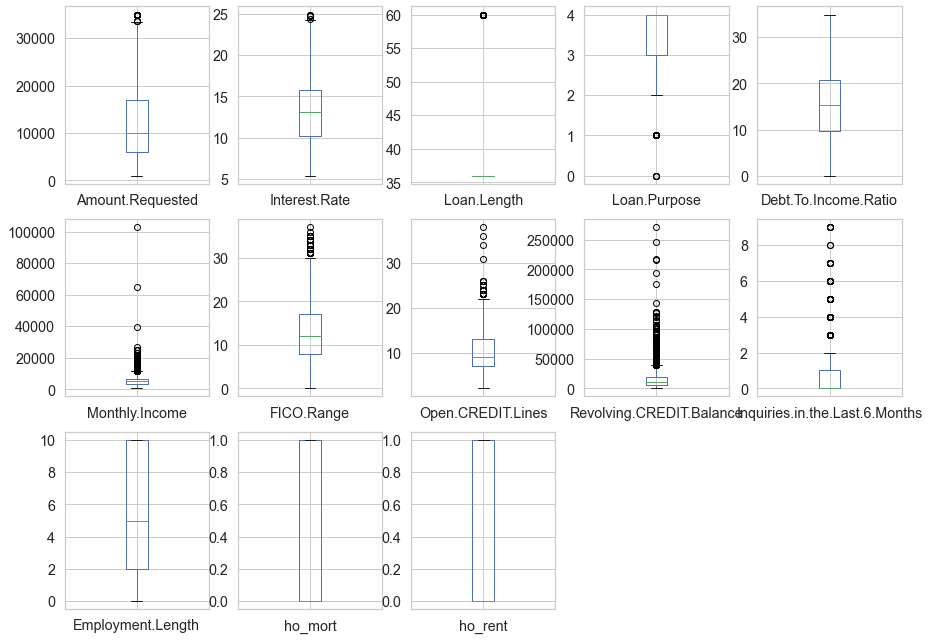

In [210]:
# Plotting the Boxplot for each column to check the outlier
df2.plot(kind="box", subplots= True, layout= (4,5), figsize= (15,15))

<span style='background:orange'> Observation: </span>

- From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.
- The second step is to remove the outliers, there are different way to remove the outliers that are find the IQR, Zscore values.

### Applying Z Score

In [211]:
#abs is absolute value
#df [condition], whatever condition it matches, it retains and others are removed
#here z score <3, it is retained and Z> 3 is removed
from scipy.stats import zscore

In [212]:
z = np.abs(zscore(df2))
print(z)

[[0.97043242 1.0005817  0.53140894 ... 1.42882832 1.08579343 0.9209855 ]
 [0.86781171 0.22872151 0.53140894 ... 0.8811108  1.08579343 0.9209855 ]
 [2.89457079 2.13480068 1.88178996 ... 0.8811108  1.08579343 0.9209855 ]
 ...
 [0.45732886 0.24350351 1.88178996 ... 1.3097593  0.9209855  0.9209855 ]
 [0.31232649 0.2195327  0.53140894 ... 1.3097593  1.08579343 0.9209855 ]
 [0.44060238 0.17159107 0.53140894 ... 1.3097593  0.9209855  1.08579343]]


In [213]:
threshold= 3
print(np.where(z<3))
print(df2.shape)

(array([   0,    0,    0, ..., 2483, 2483, 2483], dtype=int64), array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))
(2484, 13)


In [218]:
# Assigning the value to df2 which are less the threshold value and removing the outliers
df3 = df2[(z<3).all(axis = 1)]

In [219]:
print(df2.shape)
print(df3.shape)
df2 = df3
print("Shape after removing outlier", df2.shape)

(2484, 13)
(2358, 13)
Shape after removing outlier (2358, 13)


<span style='background:orange'> Observation: </span>

- We find the zscore value and then we have decided to make one threshold value as 3 which is standard of industry recommend value
- We removed all the outliers which zscore value is greater than 3
- After removing the outlier finaily there are 2358 rows and 13 columns presents in the data set

# EDA (Exploratory Data Analysis)

## Univaraiate Analysis

## Univaraiate Analysis

array([[<AxesSubplot:title={'center':'Amount.Requested'}>,
        <AxesSubplot:title={'center':'Interest.Rate'}>,
        <AxesSubplot:title={'center':'Loan.Length'}>,
        <AxesSubplot:title={'center':'Loan.Purpose'}>],
       [<AxesSubplot:title={'center':'Debt.To.Income.Ratio'}>,
        <AxesSubplot:title={'center':'Monthly.Income'}>,
        <AxesSubplot:title={'center':'FICO.Range'}>,
        <AxesSubplot:title={'center':'Open.CREDIT.Lines'}>],
       [<AxesSubplot:title={'center':'Revolving.CREDIT.Balance'}>,
        <AxesSubplot:title={'center':'Inquiries.in.the.Last.6.Months'}>,
        <AxesSubplot:title={'center':'Employment.Length'}>,
        <AxesSubplot:title={'center':'ho_mort'}>],
       [<AxesSubplot:title={'center':'ho_rent'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

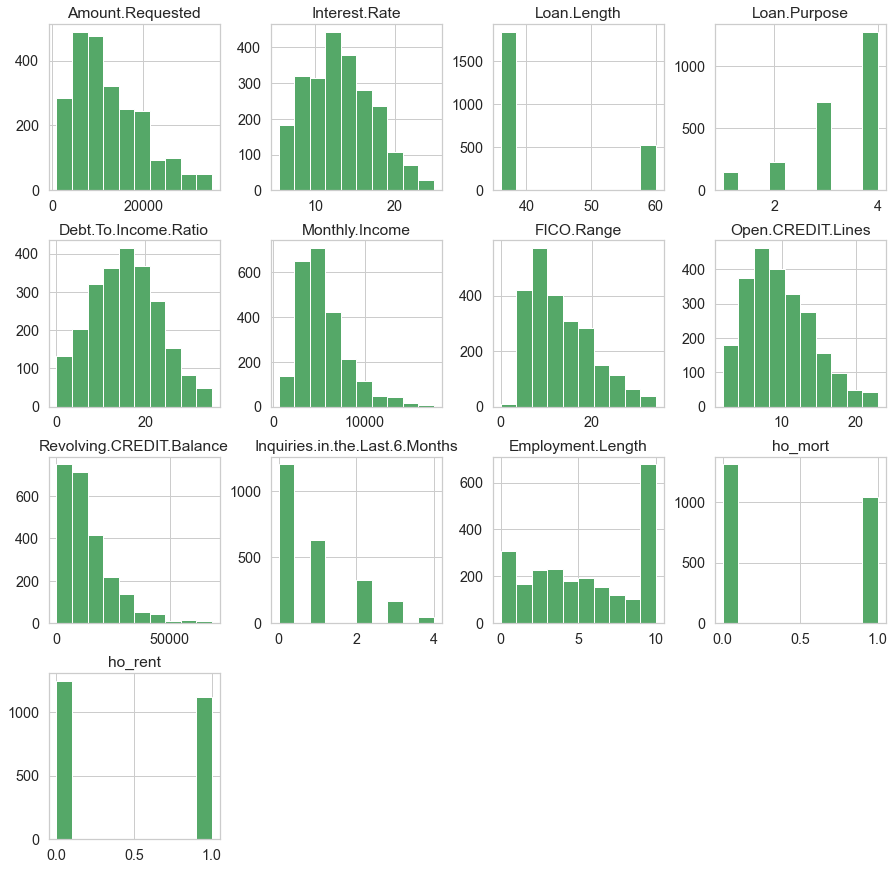

In [221]:
df3.hist(figsize = (15,15),color='g')

<span style='background:orange'> Observation: </span>
 
- Interest.Rate column is normally distributed over the histogram

## Bivariate Analysis

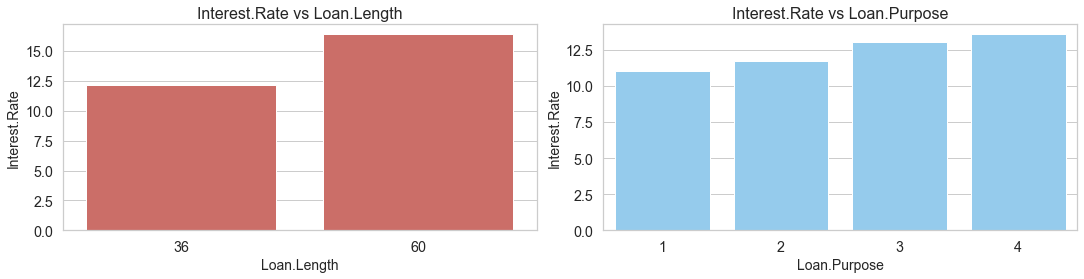

In [227]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'red']
figure = plt.figure(figsize = [15, 7])

plt.subplot(2, 2, 1)
sns.barplot(x='Loan.Length', y='Interest.Rate', data=df3, color='#DB5F57', ci=False)
plt.xlabel('Loan.Length', size = 14)
plt.ylabel('Interest.Rate', size = 14)
plt.title('Interest.Rate vs Loan.Length', size = 16)

plt.subplot(2, 2, 2)
sns.barplot(x='Loan.Purpose', y='Interest.Rate', data=df3, color='lightskyblue', ci=False)
plt.xlabel('Loan.Purpose', size = 14)
plt.ylabel('Interest.Rate', size = 14)
plt.title('Interest.Rate vs Loan.Purpose', size = 16)

plt.tight_layout()
plt.show()

## Multi Variate Analysis

### Correlation

In [228]:
dfcor=df3.corr()
dfcor

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
Amount.Requested,1.00,0.35,0.43,0.20,0.09,0.44,0.07,0.19,0.39,-0.00,0.18,0.15,-0.12
Interest.Rate,0.35,1.00,0.43,0.18,0.16,0.04,-0.71,0.07,0.14,0.17,0.05,-0.06,0.07
Loan.Length,0.43,0.43,1.00,0.03,0.03,0.12,0.02,0.05,0.12,0.06,0.09,0.09,-0.07
Loan.Purpose,0.20,0.18,0.03,1.00,0.17,0.01,-0.19,0.09,0.15,-0.01,0.07,-0.01,0.05
Debt.To.Income.Ratio,0.09,0.16,0.03,0.17,1.00,-0.17,-0.21,0.36,0.29,0.00,0.05,-0.01,-0.01
Monthly.Income,0.44,0.04,0.12,0.01,-0.17,1.00,0.10,0.23,0.39,0.04,0.13,0.24,-0.19
FICO.Range,0.07,-0.71,0.02,-0.19,-0.21,0.10,1.00,-0.09,-0.07,-0.06,0.02,0.14,-0.13
Open.CREDIT.Lines,0.19,0.07,0.05,0.09,0.36,0.23,-0.09,1.00,0.36,0.09,0.08,0.15,-0.15
Revolving.CREDIT.Balance,0.39,0.14,0.12,0.15,0.29,0.39,-0.07,0.36,1.00,-0.02,0.18,0.19,-0.16
Inquiries.in.the.Last.6.Months,-0.00,0.17,0.06,-0.01,0.00,0.04,-0.06,0.09,-0.02,1.00,-0.00,0.09,-0.08


### Visual Form (Heatmap)

We can corelate the data using heatmap (visual form) and in a tabular form as well, to sort the data easily

<AxesSubplot:>

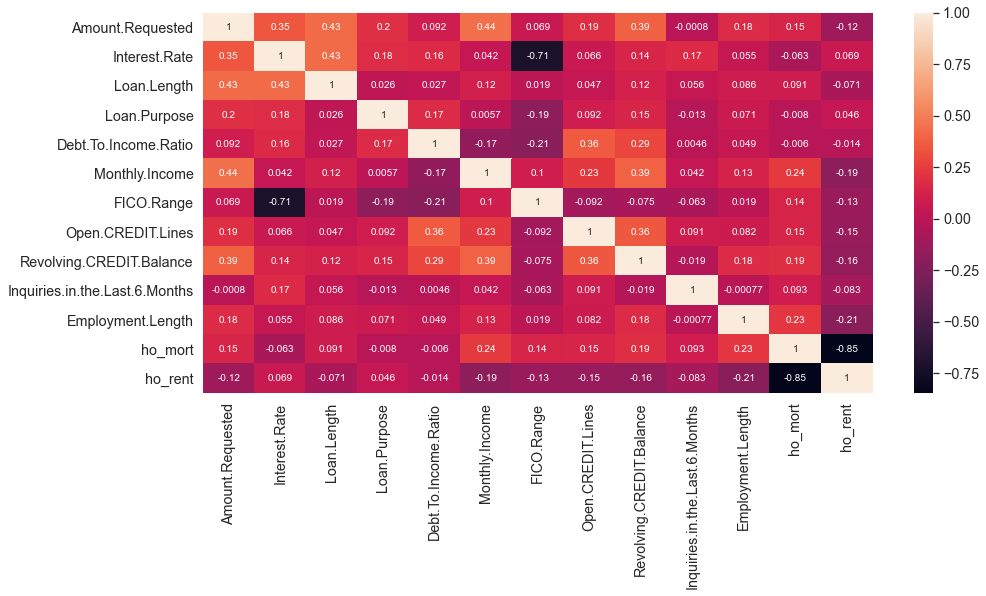

In [229]:
plt.figure(figsize=(15,7))
sns.heatmap(df3.corr(),annot=True)

In [230]:
corr_matrix = df3.corr()
corr_matrix["Interest.Rate"].sort_values(ascending=True)

FICO.Range                       -0.71
ho_mort                          -0.06
Monthly.Income                    0.04
Employment.Length                 0.05
Open.CREDIT.Lines                 0.07
ho_rent                           0.07
Revolving.CREDIT.Balance          0.14
Debt.To.Income.Ratio              0.16
Inquiries.in.the.Last.6.Months    0.17
Loan.Purpose                      0.18
Amount.Requested                  0.35
Loan.Length                       0.43
Interest.Rate                     1.00
Name: Interest.Rate, dtype: float64

### Tabular Form, to see the top co-relations more easily

In [231]:
def display_all(df3):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df3)

In [233]:
def corrank(X):
    import itertools
    df3 = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df3.sort_values(by='corr',ascending=False).reset_index(drop=True)

# prints a descending list of correlation pair (Max on top)
display_all(corrank(df3))

,Feature1,Feature2,corr
0,Amount.Requested,Monthly.Income,0.44
1,Interest.Rate,Loan.Length,0.43
2,Amount.Requested,Loan.Length,0.43
3,Monthly.Income,Revolving.CREDIT.Balance,0.39
4,Amount.Requested,Revolving.CREDIT.Balance,0.39
5,Debt.To.Income.Ratio,Open.CREDIT.Lines,0.36
6,Open.CREDIT.Lines,Revolving.CREDIT.Balance,0.36
7,Amount.Requested,Interest.Rate,0.35
8,Debt.To.Income.Ratio,Revolving.CREDIT.Balance,0.29
9,Monthly.Income,ho_mort,0.24


<span style='background:orange'> Observation: </span>
 
- Amount.Requested and Monthly.Income are highly Correlated to each other


### Correlation with Variable

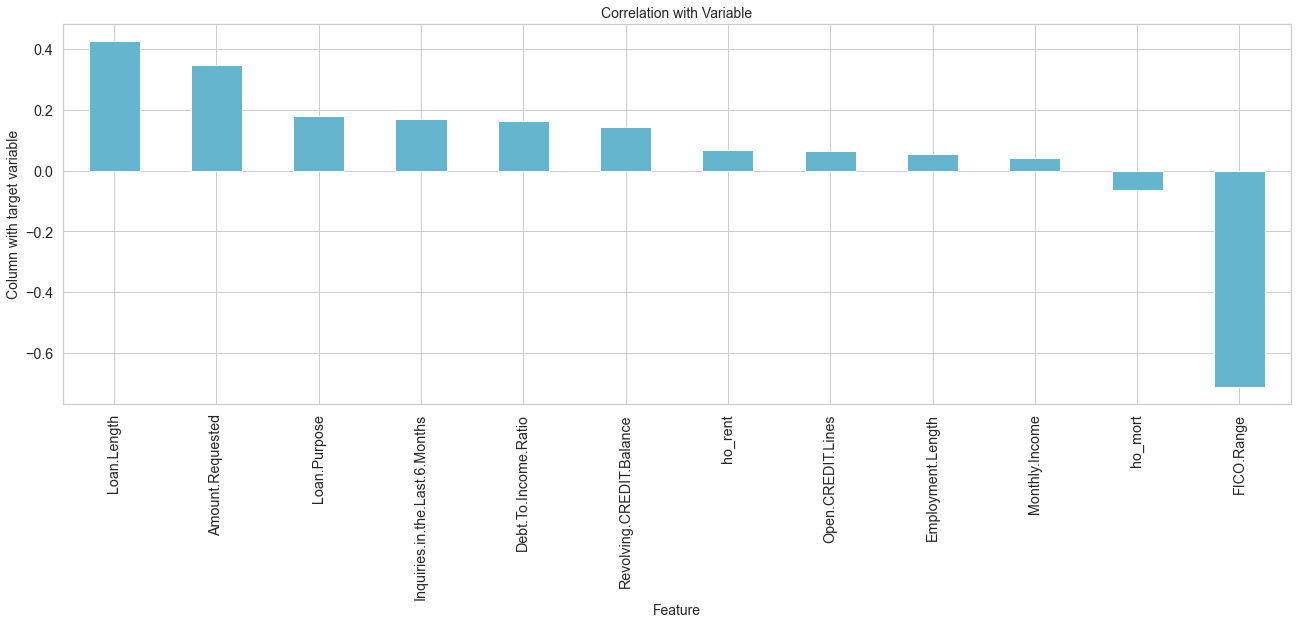

In [235]:
plt.figure(figsize=(22,7))
df3.corr()['Interest.Rate'].sort_values(ascending=False).drop(['Interest.Rate']).plot(kind="bar",color='c')
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with target variable",fontsize=14)
plt.title("Correlation with Variable",fontsize=14)
plt.show()

<span style='background:orange'> Observation: </span>

- We have seen multiple ways to check the co-relation with the target varialbe
- The last graph makes it very clear that "Monthly.Income" is close to 0 co-relation
- All the Features have positive or a negative co-relation 

## Skewness

In [236]:
df3.skew()

Amount.Requested                  0.90
Interest.Rate                     0.27
Loan.Length                       1.34
Loan.Purpose                     -1.21
Debt.To.Income.Ratio              0.16
Monthly.Income                    1.24
FICO.Range                        0.79
Open.CREDIT.Lines                 0.60
Revolving.CREDIT.Balance          1.55
Inquiries.in.the.Last.6.Months    1.16
Employment.Length                 0.06
ho_mort                           0.23
ho_rent                           0.11
dtype: float64

In [237]:
print("Number of numerical columns: ",len(df3.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(df3.skew().loc[abs(df3.skew())>0.5]))

Number of numerical columns:  13
Number of columns which are skewed not in -0.5 to +0.5 range:  8


**Note:** Before handling skewness lets remove our target column(y)

In [238]:
toskew_df2=df3.drop(columns=["Interest.Rate"])
y=df3[["Interest.Rate"]]

In [239]:
#lets treat the skewness in the X datset, for which skewness is present
import numpy as np
for index in toskew_df2.skew().index:
    if toskew_df2.skew().loc[index]>0.5:
        toskew_df2[index]=np.log1p(toskew_df2[index])
    if toskew_df2.skew().loc[index]<-0.5:
        toskew_df2[index]=np.square(toskew_df2[index])

In [240]:
#lets again check, how many columns are still skewed
print("Number of numerical columns: ",len(toskew_df2.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(toskew_df2.skew().loc[abs(toskew_df2.skew())>0.5]))

Number of numerical columns:  12
Number of columns which are skewed not in -0.5 to +0.5 range:  4


In [241]:
toskew_df2.skew()

Amount.Requested                 -0.37
Loan.Length                       1.34
Loan.Purpose                     -0.73
Debt.To.Income.Ratio              0.16
Monthly.Income                   -0.19
FICO.Range                       -0.29
Open.CREDIT.Lines                -0.35
Revolving.CREDIT.Balance         -1.45
Inquiries.in.the.Last.6.Months    0.54
Employment.Length                 0.06
ho_mort                           0.23
ho_rent                           0.11
dtype: float64

**Note:** As there is still some values have values far from 0, we will drop another column whose corelation is nearer to 0

In [242]:
toskew_df3=toskew_df2.drop(columns=["Monthly.Income"])
y=toskew_df2[["Monthly.Income"]]

In [243]:
#lets treat the skewness in the X datset, for which skewness is present
import numpy as np
for index in toskew_df3.skew().index:
    if toskew_df3.skew().loc[index]>0.5:
        toskew_df3[index]=np.log1p(toskew_df3[index])
    if toskew_df3.skew().loc[index]<-0.5:
        toskew_df3[index]=np.square(toskew_df3[index])

In [244]:
#lets again check, how many columns are still skewed
print("Number of numerical columns: ",len(toskew_df3.skew()))
print("Number of columns which are skewed not in -0.5 to +0.5 range: ",len(toskew_df3.skew().loc[abs(toskew_df3.skew())>0.5]))

Number of numerical columns:  11
Number of columns which are skewed not in -0.5 to +0.5 range:  1


toskew_df3.skew()

<span style='background:orange'> Observation: </span>

- We first calculated the skew value and some of the column skew value are far from zero
- The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero
- In the last cell I am again checking the skewness value and there is difference between the first skewness value and second, now the skewness value of each column is near to zero
- Making the skewness value near to zero will help to get better score

## Standard Scalar

I am using the standard scaling method on x variable

In [251]:
toskew_df3.describe()

,Amount.Requested,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
count,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00
mean,85.17,1.55,164.23,15.43,2.52,2.31,7347.79,0.32,5.21,0.44,0.47
std,12.65,0.04,102.16,7.48,0.50,0.41,2896.38,0.34,3.64,0.50,0.50
min,47.73,1.53,1.00,0.00,0.00,1.10,0.00,0.00,0.00,0.00,0.00
25%,75.68,1.53,81.00,9.75,2.20,2.08,5555.72,0.00,2.00,0.00,0.00
50%,84.83,1.53,256.00,15.32,2.56,2.30,7433.36,0.00,5.00,0.00,0.00
75%,94.54,1.53,256.00,20.70,2.89,2.64,9286.78,0.53,10.00,1.00,1.00
max,109.48,1.63,256.00,34.91,3.56,3.18,15380.40,0.96,10.00,1.00,1.00


In [252]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(toskew_df3)
x=sc.transform(toskew_df3)
x=pd.DataFrame(toskew_df3)

In [253]:
x.describe()

,Amount.Requested,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
count,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00,2358.00
mean,85.17,1.55,164.23,15.43,2.52,2.31,7347.79,0.32,5.21,0.44,0.47
std,12.65,0.04,102.16,7.48,0.50,0.41,2896.38,0.34,3.64,0.50,0.50
min,47.73,1.53,1.00,0.00,0.00,1.10,0.00,0.00,0.00,0.00,0.00
25%,75.68,1.53,81.00,9.75,2.20,2.08,5555.72,0.00,2.00,0.00,0.00
50%,84.83,1.53,256.00,15.32,2.56,2.30,7433.36,0.00,5.00,0.00,0.00
75%,94.54,1.53,256.00,20.70,2.89,2.64,9286.78,0.53,10.00,1.00,1.00
max,109.48,1.63,256.00,34.91,3.56,3.18,15380.40,0.96,10.00,1.00,1.00


# Machine Learning (Model Building)

## Importing Libraries

In [271]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR

## Train & Test Data

<span style='background:orange'>   We create a list of the Features and Target Variable (AveragePrice) </span>

In [254]:
#listing the column names, so it is easy to copy paste later during Train/test data
df3.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'ho_mort',
       'ho_rent'],
      dtype='object')

In [255]:
features = ['Amount.Requested', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length', 'ho_mort', 'ho_rent']        
target = ['Interest.Rate']

In [256]:
df3[features].head(5)
df3[target].head(5)

,Interest.Rate
0,8.90
1,12.12
2,21.98
3,9.99
4,11.71


In [257]:
x = df3[features]
y = df3[target]

In [258]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df3[features], df3[target], test_size=0.2, random_state=2)

In [259]:
x_train.head()

,Amount.Requested,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
2189,10000.00,36,4,13.10,4458.33,7.00,6413.00,1.00,0,1,0
1441,8000.00,36,4,21.11,8583.33,15.00,14584.00,3.00,5,1,0
1591,3800.00,36,3,3.18,3583.33,9.00,3766.00,0.00,4,0,1
345,1675.00,36,4,4.81,2080.00,4.00,1466.00,0.00,3,0,1
842,25000.00,60,2,4.95,3333.33,9.00,3367.00,3.00,2,1,0


In [260]:
y_train.head()

,Interest.Rate
2189,15.80
1441,17.99
1591,6.99
345,11.11
842,11.49


In [261]:
x_test.head()

,Amount.Requested,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,ho_mort,ho_rent
1165,18000.00,36,4,26.08,5925.00,14.00,23378.00,0.00,10,1,0
806,8000.00,36,3,0.24,4250.00,4.00,132.00,3.00,5,0,1
795,13500.00,60,4,12.59,8833.33,11.00,18978.00,0.00,2,1,0
2097,21000.00,60,4,16.18,7083.33,8.00,22298.00,1.00,9,1,0
1225,10000.00,36,4,17.88,2500.00,6.00,11120.00,0.00,3,0,1


In [262]:
y_test.head()

,Interest.Rate
1165,10.16
806,9.63
795,13.99
2097,11.14
1225,10.74


## Finding best Random state

In [263]:
pd.isnull(df3).sum() > 0

Amount.Requested                  False
Interest.Rate                     False
Loan.Length                       False
Loan.Purpose                      False
Debt.To.Income.Ratio              False
Monthly.Income                    False
FICO.Range                        False
Open.CREDIT.Lines                 False
Revolving.CREDIT.Balance          False
Inquiries.in.the.Last.6.Months    False
Employment.Length                 False
ho_mort                           False
ho_rent                           False
dtype: bool

In [264]:
maxAccu=0
BestRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)    
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        BestRs=i
print("Best accuracy is ", maxAccu,"on Random_state  ",BestRs)

Best accuracy is  0.3700554271639198 on Random_state   111


In [265]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=BestRs)

print('Train cases as below')
print('x_train shape : ',x_train.shape)
print('y_train shape: ',y_train.shape)
print('***************************')
print('Test cases as below')
print('x_test shape: ',x_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
x_train shape :  (1886, 11)
y_train shape:  (1886, 1)
***************************
Test cases as below
x_test shape:  (472, 11)
y_test shape:  (472, 1)


## Model Building and Finding Difference of Cross Validation from R2 & RMSE

In [272]:
lm=LinearRegression()
ridge = Ridge()
gb= GradientBoostingRegressor()
dt  = DecisionTreeRegressor()
rf  = RandomForestRegressor()
knn = KNeighborsRegressor()
ls=Lasso()
svr=SVR()

In [273]:
modelList=[("Linear Regression", lm), ("Lasso",ls),("Ridge", ridge),("Gradient boosting",gb),("Decision Tree", dt),("Random Forest",rf),("Kneighbor",knn)]

def GetAccuracy(x,y,modelList):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    modelCrossval1=[]
    RMSECVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(x_train,y_train)
        pred=modelInstance.predict(x_test)
        error=modelInstance.score(x_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='r2').mean()
        crossAcc1=cross_val_score(modelInstance,x,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='neg_root_mean_squared_error').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        modelCrossval1.append(crossAcc1)
        RMSECVDiff.append(RMSE-crossAcc1)
        
    df_acc=pd.DataFrame({"Name":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "Cross Validation":modelCrossval,
                         "R2 and CV Difference":R2CVDiff,
                         "RMSE and CV Difference":RMSECVDiff
                          })
    return df_acc
GetAccuracy(x,y,modelList)

,Name,Error,R2,MAE,MSE,RMSE,Cross Validation,R2 and CV Difference,RMSE and CV Difference
0,Linear Regression,0.27,0.34,2.75,11.25,3.35,0.28,0.06,6.86
1,Lasso,0.22,0.29,2.86,12.13,3.48,0.23,0.06,7.11
2,Ridge,0.27,0.34,2.75,11.25,3.35,0.28,0.06,6.85
3,Gradient boosting,0.48,0.38,2.63,10.67,3.27,0.32,0.06,6.68
4,Decision Tree,1.00,-0.35,3.86,23.06,4.80,-0.47,0.13,9.72
5,Random Forest,0.89,0.35,2.67,11.08,3.33,0.29,0.06,6.85
6,Kneighbor,0.32,0.05,3.26,16.30,4.04,-0.01,0.06,8.17


<span style='background:orange'> Observation: </span>

- We have used 7 models for Model Building
- We have used 5 Evaluation Techniques
- We have evaluated the difference between R2 and Cross Validation. Also, the difference between RMSE and Cross Validation
- The best way to select a model is to have high R2 and low RMSE
- Random Forest have high R2 and low RMSE
- Also, the difference between R2 and Cross Validation and the difference between RMSE and Cross Validation is low in case of Random Forest Model
- We will use Gradient boosting model for our model tuning


## Feature Engineering- Model building by removing low co-related column

In [274]:
x.columns
df3.columns

Index(['Amount.Requested', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose',
       'Debt.To.Income.Ratio', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'ho_mort',
       'ho_rent'],
      dtype='object')

In [275]:
b=df3.drop(columns=["Interest.Rate",'Monthly.Income'])
y=df3["Interest.Rate"]

In [276]:
modelList=[("Lin Reg", lm), ("Lasso",ls),("Ridge", ridge),("Gradient boost",gb),("Decision Tree", dt),("Random Forest",rf),("Kneigbor",knn)]

def GetAccuracy(b,y,modelList):
    b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)
    modelerror=[]
    ModelName= []
    modelR2=[]
    modelMAE=[]
    modelMSE=[]
    modelRMSE=[]
    modelCrossval=[]
    R2CVDiff=[]
    modelCrossval1=[]
    RMSECVDiff=[]
    
    for Nameofmodel, modelInstance in modelList:
        ModelName.append(Nameofmodel)
        modelInstance.fit(b_train,y_train)
        pred=modelInstance.predict(b_test)
        error=modelInstance.score(b_train,y_train)
        modelerror.append(error)
        r2=r2_score(y_test,pred)
        modelR2.append(r2)
        mae = mean_absolute_error(y_test,pred)
        modelMAE.append(mae)
        MSE=mean_squared_error(y_test,pred)
        modelMSE.append(MSE)
        RMSE=sqrt(mean_squared_error(y_test,pred))
        modelRMSE.append(RMSE)
        
        crossAcc=cross_val_score(modelInstance,b,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='r2').mean()
        crossAcc1=cross_val_score(modelInstance,b,y,cv=(KFold(n_splits=10,shuffle=True)),scoring='neg_root_mean_squared_error').mean()
        modelCrossval.append(crossAcc)
        R2CVDiff.append(r2-crossAcc)
        modelCrossval1.append(crossAcc1)
        RMSECVDiff.append(RMSE-crossAcc1)
        
    df_acc=pd.DataFrame({"FEName":ModelName,
                         "Error":modelerror,
                         "R2": modelR2,
                         "MAE": modelMAE,
                         "MSE": modelMSE,
                         "RMSE": modelRMSE,                         
                         "CrossValidation":modelCrossval,
                         "R2CVDiff":R2CVDiff,
                         "RMSECVDiff":RMSECVDiff
                          })
    return df_acc
GetAccuracy(b,y,modelList)

,FEName,Error,R2,MAE,MSE,RMSE,CrossValidation,R2CVDiff,RMSECVDiff
0,Lin Reg,0.76,0.81,1.39,3.25,1.80,0.77,0.04,3.78
1,Lasso,0.74,0.79,1.47,3.52,1.88,0.75,0.04,3.93
2,Ridge,0.76,0.81,1.39,3.25,1.80,0.77,0.04,3.78
3,Gradient boost,0.87,0.88,1.11,2.13,1.46,0.83,0.04,3.14
4,Decision Tree,1.00,0.67,1.72,5.63,2.37,0.63,0.04,4.80
5,Random Forest,0.97,0.85,1.19,2.51,1.58,0.81,0.04,3.34
6,Kneigbor,0.32,-0.03,3.38,17.63,4.20,-0.02,-0.01,8.36


<span style='background:orange'> Observation: </span>

- After dropping one column, our score for Gradient boost has not improved 
- So for the same reasons (High R2 and low RMSE) we are choosing Gradient boost again for our Hyperparameter tuning
- We will also take Random Forest for Hyperparameter tuning


## Hyper Parameter Tuning

In [277]:
from sklearn.model_selection import GridSearchCV

### Random Forest Regressor

In [278]:
b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)

In [279]:
parameters ={
              'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]
             }

In [280]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=(KFold(n_splits=15,shuffle=True)))

In [281]:
GCV.fit(b_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [282]:
GCV.best_params_

{'criterion': 'mae', 'max_features': 'auto'}

In [283]:
mod1=RandomForestRegressor(criterion="mse",max_features="sqrt")
mod1.fit(b_train,y_train)
pred=mod1.predict(b_test)
print(r2_score(y_test,pred))

0.8419948070843398


### Gradient Boosting Regressor

In [284]:
b_train,b_test,y_train,y_test=train_test_split(b,y,random_state=BestRs)

In [285]:
parameters = {
                "min_samples_split": range(6, 11)}

In [286]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [287]:
GCV.fit(b_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'min_samples_split': range(6, 11)})

In [288]:
GCV.best_params_

{'min_samples_split': 7}

In [289]:
mod3=GradientBoostingRegressor(min_samples_split=8)
mod3.fit(b_train,y_train)
pred=mod3.predict(b_test)
print(r2_score(y_test,pred))

0.8761537045611499


<span style='background:orange'> Observation: </span>

- Hyper Parameter Tuning on the Feature Engineered Model, has improved for all 
- Gradient Boosting Regressor is the highest which is 0.87

# Conclusion

- After loading the data properly, we found that it had a lot of “NAN” values. So, we removed the “NAN” values
- From further analysis we found it is a Regression data set
- After removing the “NAN” values, few columns which were not required were dropped
- We had to do Label Encoding for few columns
- Outliers handled applying Zscore and Skewness through log transformation
- Model Building Was done in 2 ways after finding the Best Random state
- In Model 1, we have used 7 models and 5 Evaluation Techniques. Also, we have found the difference between R2 and Cross Validation, RMSE and Cross Validation and found Gradient Boosting Regressor Model is the best model
- In Model 2, we have used Feature Engineered by dropping a column for which the co-relation was close to “0”. And we found an improvement for Gradient Boosting Regressor Model
- Hyper Tuning was done on 2 models
- As per the evaluation with (80:20) training and testing data Gradient Boosting Regressor model is the best model
- Gradient Boosting Regressor is the highest which is 0.87

# Convert the dataset into Excel 

In [63]:
GFG = pd.ExcelWriter('bank_data.xlsx')
df1.to_excel(GFG, index = False)
  
GFG.save()